In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 100)

In [4]:
cust = pd.read_csv("Customers.csv")
prod = pd.read_csv("Products.csv")
tran = pd.read_csv("Transactions.csv")

In [5]:
cust.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [6]:
prod.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [7]:
tran.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#
---
# Checking Nulls

In [8]:
cust.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [9]:
prod.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

In [10]:
tran.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [11]:
print(f"Cutomers Shape : {cust.shape} \nProducts Shape : {prod.shape} \nTransaction Shape : {tran.shape}")

Cutomers Shape : (200, 4) 
Products Shape : (100, 4) 
Transaction Shape : (1000, 7)


## `No NULLs, We are good to go`

#
---
# Checking the datatypes correctness

In [12]:
cust.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [13]:
cust['SignupDate'] = pd.to_datetime(cust['SignupDate'])

In [14]:
cust.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

In [15]:
prod.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [16]:
tran.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [17]:
tran['TransactionDate'] = pd.to_datetime(tran['TransactionDate'])

In [18]:
tran.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

## `The Date features in the Customers and Transaction tables are of objects, I reassigned to datetime`

#
---
# Merging the three tables into single

In [19]:
df = pd.merge(left=tran, right=cust, on="CustomerID", how="left")

In [20]:
df = pd.merge(left=df, right=prod, on=["ProductID", "Price"], how="left")

In [21]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [22]:
df.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
dtype: int64

#
---
# Checking Outliers

Text(0.5, 1.0, 'Price boxplot')

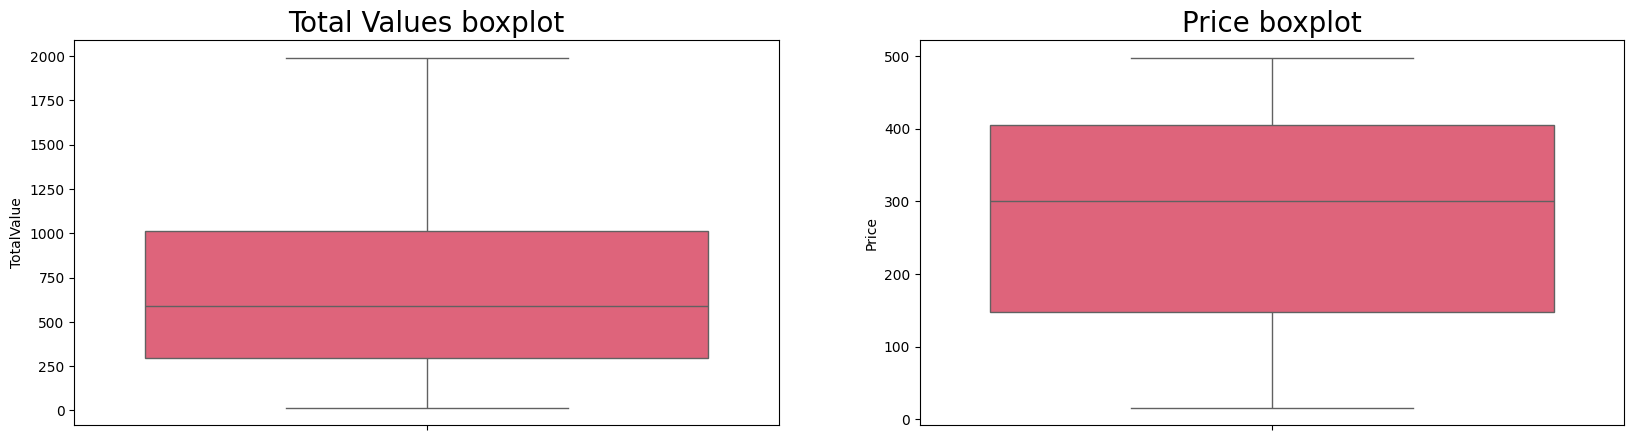

In [23]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df["TotalValue"], color="#F2506E")
plt.title("Total Values boxplot", fontdict={"size" : 20})

plt.subplot(1, 2, 2)
sns.boxplot(df["Price"], color="#F2506E")
plt.title("Price boxplot", fontdict={"size" : 20})

## `No Outliers in numeric columns`

#
---
# Creating New Feature

In [24]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


### Creating Sub-categories

In [25]:
mini = df.groupby(by="Category")["ProductName"].unique()
mini.index
for i, j in zip(mini.index, mini):
    print(f"{i} --->>> {j}")
    print("===="*20)

Books --->>> ['TechPro Textbook' 'BookWorld Biography' 'HomeSense Novel'
 'SoundWave Cookbook' 'SoundWave Mystery Book' 'ComfortLiving Biography'
 'SoundWave Novel' 'TechPro Novel' 'ActiveWear Textbook'
 'ActiveWear Cookbook' 'BookWorld Cookbook' 'TechPro Cookbook'
 'SoundWave Textbook' 'ActiveWear Biography' 'ComfortLiving Mystery Book']
Clothing --->>> ['HomeSense T-Shirt' 'TechPro Running Shoes' 'BookWorld Running Shoes'
 'ActiveWear Jeans' 'BookWorld Jacket' 'HomeSense Sweater'
 'ActiveWear Running Shoes' 'SoundWave Jeans' 'SoundWave Jacket'
 'BookWorld Sweater' 'HomeSense Running Shoes' 'ActiveWear T-Shirt'
 'TechPro T-Shirt' 'ActiveWear Jacket' 'ComfortLiving Sweater'
 'SoundWave T-Shirt']
Electronics --->>> ['ComfortLiving Bluetooth Speaker' 'ActiveWear Smartphone'
 'ComfortLiving Smartphone' 'ComfortLiving Smartwatch'
 'BookWorld Smartwatch' 'ActiveWear Smartwatch' 'SoundWave Headphones'
 'TechPro Smartwatch' 'ActiveWear Headphones'
 'HomeSense Bluetooth Speaker' 'HomeSense Hea

In [26]:
df["ProductName"] = df["ProductName"].replace({
        'SoundWave Mystery Book' : 'SoundWave MysteryBook',
        'ComfortLiving Mystery Book' : 'ComfortLiving MysteryBook',
        'TechPro Running Shoes' : 'TechPro RunningShoes',
        'BookWorld Running Shoes' : 'BookWorld RunningShoes',
        'ActiveWear Running Shoes' : 'ActiveWear RunningShoes',
        'HomeSense Running Shoes' : 'HomeSense RunningShoes',
        'ComfortLiving Bluetooth Speaker' : 'ComfortLiving BluetoothSpeaker',
        'HomeSense Bluetooth Speaker' : 'HomeSense BluetoothSpeaker',
        'BookWorld Bluetooth Speaker' : 'BookWorld BluetoothSpeaker',
        'SoundWave Bluetooth Speaker' : 'SoundWave BluetoothSpeaker',
        'ActiveWear Cookware Set' : 'ActiveWear CookwareSet',
        'BookWorld Cookware Set' : 'BookWorld CookwareSet',
        'HomeSense Desk Lamp' : 'HomeSense DeskLamp',
        'ComfortLiving Cookware Set' : 'ComfortLiving CookwareSet',
        'ActiveWear Wall Art' : 'ActiveWear WallArt',
        'HomeSense Wall Art' : 'HomeSense WallArt',
        'SoundWave Desk Lamp' : 'SoundWave DeskLamp',
        'ComfortLiving Desk Lamp' : 'ComfortLiving DeskLamp',
        'BookWorld Wall Art' : 'BookWorld WallArt',
        'HomeSense Cookware Set' : 'HomeSense CookwareSet'
    })

In [27]:
mini = df.groupby(by="Category")["ProductName"].unique()
mini.index
for i, j in zip(mini.index, mini):
    print(f"{i} --->>> {j}")
    print("===="*20)

Books --->>> ['TechPro Textbook' 'BookWorld Biography' 'HomeSense Novel'
 'SoundWave Cookbook' 'SoundWave MysteryBook' 'ComfortLiving Biography'
 'SoundWave Novel' 'TechPro Novel' 'ActiveWear Textbook'
 'ActiveWear Cookbook' 'BookWorld Cookbook' 'TechPro Cookbook'
 'SoundWave Textbook' 'ActiveWear Biography' 'ComfortLiving MysteryBook']
Clothing --->>> ['HomeSense T-Shirt' 'TechPro RunningShoes' 'BookWorld RunningShoes'
 'ActiveWear Jeans' 'BookWorld Jacket' 'HomeSense Sweater'
 'ActiveWear RunningShoes' 'SoundWave Jeans' 'SoundWave Jacket'
 'BookWorld Sweater' 'HomeSense RunningShoes' 'ActiveWear T-Shirt'
 'TechPro T-Shirt' 'ActiveWear Jacket' 'ComfortLiving Sweater'
 'SoundWave T-Shirt']
Electronics --->>> ['ComfortLiving BluetoothSpeaker' 'ActiveWear Smartphone'
 'ComfortLiving Smartphone' 'ComfortLiving Smartwatch'
 'BookWorld Smartwatch' 'ActiveWear Smartwatch' 'SoundWave Headphones'
 'TechPro Smartwatch' 'ActiveWear Headphones' 'HomeSense BluetoothSpeaker'
 'HomeSense Headphones'

In [28]:
company = []
item = []

for i in df["ProductName"].map(str.split):
    company.append(i[0])
    item.append(i[1])

In [29]:
df["Company"] = company
df["Item"] = item

In [30]:
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Company,Item
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,SoundWave,Smartwatch
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,SoundWave,Smartwatch
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,SoundWave,Smartwatch
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,SoundWave,Smartwatch


In [31]:
data = df.copy()

# Visual Analysis and making new features

<Axes: xlabel='Company', ylabel='TotalValue'>

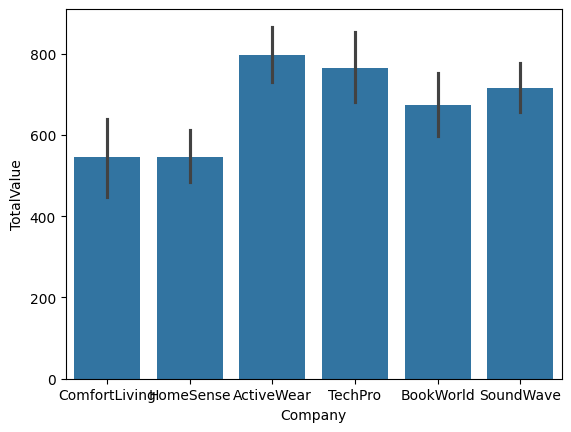

In [32]:
sns.barplot(x=df["Company"], y=df["TotalValue"])

In [33]:
df[["Company", "TotalValue"]].describe()

,TotalValue
count,1000.000000
mean,689.995560
std,493.144478
min,16.080000
25%,295.295000
50%,588.880000
75%,1011.660000
max,1991.040000


In [34]:
df["Company_Pricing_Category"] = df.groupby(by="Company")["TotalValue"].transform(lambda x : 2 if x.median() > 600 else 1)

<Axes: xlabel='Item', ylabel='TotalValue'>

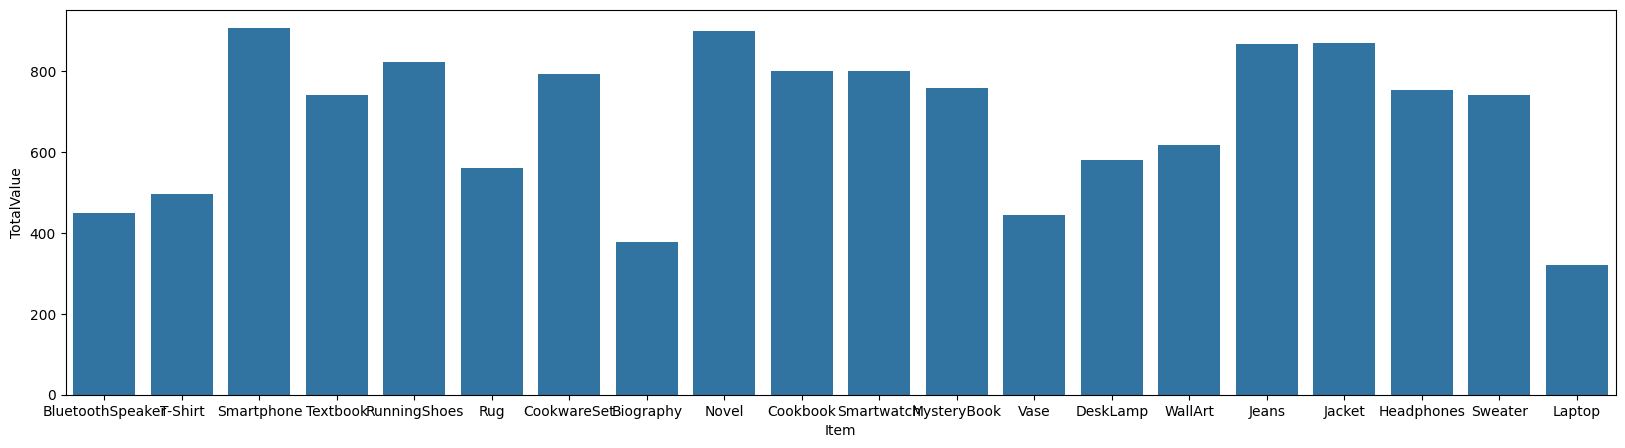

In [35]:
plt.figure(figsize=(20, 5))

sns.barplot(x=df["Item"], y=df["TotalValue"], errorbar=None)

In [36]:
df[["Item", "TotalValue"]].describe()

,TotalValue
count,1000.000000
mean,689.995560
std,493.144478
min,16.080000
25%,295.295000
50%,588.880000
75%,1011.660000
max,1991.040000


In [37]:
df["Item_Pricing_Category"] = df.groupby(by="Item")["TotalValue"].transform(lambda x : 3 if x.median() > 700 else (2 if x.median() > 500 else 1))

### Creating RFM (Recency, Frequency, and Monetary) on CustomerID

In [38]:
df["Recency from Today"] = (pd.Timestamp.today() - df.groupby(by="CustomerID")["TransactionDate"].transform("max")).dt.days

In [39]:
# df["Most Recent Order"] = df.groupby(by="CustomerID")["TransactionDate"].transform("max")

In [40]:
df["Frequency"] = df.groupby(by="CustomerID")["TransactionID"].transform("count")

In [41]:
df["Monetary"] = df.groupby(by="CustomerID")["TotalValue"].transform("sum")

In [42]:
df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Company,Item,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,97,4,1979.28
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,43,4,2570.80
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,133,6,3232.88
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,139,7,6604.23
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,116,4,3125.49


In [43]:
df["Difference of Transaction and Signup"] = (df["TransactionDate"] - df["SignupDate"]).dt.days

In [44]:
indexes = df[["TransactionID", "CustomerID", "ProductID"]]
df.drop(columns=["TransactionID", "CustomerID", "ProductID"], inplace=True)

In [45]:
indexes.head()

,TransactionID,CustomerID,ProductID
0,T00001,C0199,P067
1,T00112,C0146,P067
2,T00166,C0127,P067
3,T00272,C0087,P067
4,T00363,C0070,P067


In [46]:
df.head()

,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Company,Item,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup
0,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,97,4,1979.28,631
1,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,43,4,2570.80,-100
2,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,133,6,3232.88,21
3,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,139,7,6604.23,-16
4,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,116,4,3125.49,737


## Multi Target Encoding for High Cardinality Features

In [47]:
# df["CustomerName_min"] = df.groupby(by="CustomerName")["TotalValue"].transform("min")
# df["CustomerName_max"] = df.groupby(by="CustomerName")["TotalValue"].transform("max")
# df["CustomerName_mean"] = df.groupby(by="CustomerName")["TotalValue"].transform("mean")
# df["CustomerName_median"] = df.groupby(by="CustomerName")["TotalValue"].transform("median")
# df["CustomerName_std"] = df.groupby(by="CustomerName")["TotalValue"].transform("std")
# # df["CustomerName_count"] = df.groupby(by="CustomerName")["TotalValue"].transform("count")
# # df["CustomerName_sum"] = df.groupby(by="CustomerName")["TotalValue"].transform("sum")

In [48]:
# df["CustomerName_std"] = df["CustomerName_std"].fillna(df["CustomerName_std"].median())

In [49]:
# df["ProductName_min"] = df.groupby(by="ProductName")["TotalValue"].transform("min")
# df["ProductName_max"] = df.groupby(by="ProductName")["TotalValue"].transform("max")
# df["ProductName_mean"] = df.groupby(by="ProductName")["TotalValue"].transform("mean")
# df["ProductName_median"] = df.groupby(by="ProductName")["TotalValue"].transform("median")
# df["ProductName_std"] = df.groupby(by="ProductName")["TotalValue"].transform("std")
# df["ProductName_count"] = df.groupby(by="ProductName")["TotalValue"].transform("count")
# df["ProductName_sum"] = df.groupby(by="ProductName")["TotalValue"].transform("sum")

In [50]:
# df.drop(columns=["CustomerName", "ProductName"], inplace=True)

In [51]:
# df["Company_min"] = df.groupby(by="Company")["TotalValue"].transform("min")
# df["Company_max"] = df.groupby(by="Company")["TotalValue"].transform("max")
# df["Company_mean"] = df.groupby(by="Company")["TotalValue"].transform("mean")
# df["Company_median"] = df.groupby(by="Company")["TotalValue"].transform("median")
# df["Company_std"] = df.groupby(by="Company")["TotalValue"].transform("std")
# df["Company_count"] = df.groupby(by="Company")["TotalValue"].transform("count")
# df["Company_sum"] = df.groupby(by="Company")["TotalValue"].transform("sum")

In [52]:
# df["Item_min"] = df.groupby(by="Item")["TotalValue"].transform("min")
# df["Item_max"] = df.groupby(by="Item")["TotalValue"].transform("max")
# df["Item_mean"] = df.groupby(by="Item")["TotalValue"].transform("mean")
# df["Item_median"] = df.groupby(by="Item")["TotalValue"].transform("median")
# df["Item_std"] = df.groupby(by="Item")["TotalValue"].transform("std")
# df["Item_count"] = df.groupby(by="Item")["TotalValue"].transform("count")
# df["Item_sum"] = df.groupby(by="Item")["TotalValue"].transform("sum")

In [53]:
# df.drop(columns=["Company", "Item"], inplace=True)

In [54]:
df.head()

,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,Company,Item,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup
0,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,97,4,1979.28,631
1,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,43,4,2570.80,-100
2,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,133,6,3232.88,21
3,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,139,7,6604.23,-16
4,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving BluetoothSpeaker,Electronics,ComfortLiving,BluetoothSpeaker,1,1,116,4,3125.49,737


# One Hot Encoding

In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
region_encoder = OneHotEncoder(dtype="int", drop="first", sparse_output=False)

In [57]:
df = pd.concat([df, pd.DataFrame(region_encoder.fit_transform(df[["Region"]]), columns=region_encoder.get_feature_names_out())], axis=1)

In [58]:
category_encoder = OneHotEncoder(dtype="int", drop="first", sparse_output=False)

In [59]:
df = pd.concat([df, pd.DataFrame(category_encoder.fit_transform(df[["Category"]]), columns=category_encoder.get_feature_names_out())], axis=1)

In [60]:
company_encoder = OneHotEncoder(dtype="int", drop="first", sparse_output=False)

In [61]:
df = pd.concat([df, pd.DataFrame(company_encoder.fit_transform(df[["Company"]]), columns=company_encoder.get_feature_names_out())], axis=1)

In [62]:
item_encoder = OneHotEncoder(dtype="int", drop="first", sparse_output=False)

In [63]:
df = pd.concat([df, pd.DataFrame(item_encoder.fit_transform(df[["Item"]]), columns=item_encoder.get_feature_names_out())], axis=1)

In [64]:
df.drop(columns=["Region", "Category", "Company", "Item"], inplace=True)

In [65]:
df.head()

,TransactionDate,Quantity,TotalValue,Price,CustomerName,SignupDate,ProductName,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,Company_BookWorld,Company_ComfortLiving,Company_HomeSense,Company_SoundWave,Company_TechPro,Item_BluetoothSpeaker,Item_Cookbook,Item_CookwareSet,Item_DeskLamp,Item_Headphones,Item_Jacket,Item_Jeans,Item_Laptop,Item_MysteryBook,Item_Novel,Item_Rug,Item_RunningShoes,Item_Smartphone,Item_Smartwatch,Item_Sweater,Item_T-Shirt,Item_Textbook,Item_Vase,Item_WallArt
0,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,2022-12-03,ComfortLiving BluetoothSpeaker,1,1,97,4,1979.28,631,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,2024-09-04,ComfortLiving BluetoothSpeaker,1,1,43,4,2570.80,-100,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,2024-04-04,ComfortLiving BluetoothSpeaker,1,1,133,6,3232.88,21,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,2024-04-11,ComfortLiving BluetoothSpeaker,1,1,139,7,6604.23,-16,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,2022-03-15,ComfortLiving BluetoothSpeaker,1,1,116,4,3125.49,737,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df["TransactionDate_day"] = df["TransactionDate"].dt.day
df["TransactionDate_month"] = df["TransactionDate"].dt.month
df["TransactionDate_year"] = df["TransactionDate"].dt.year
df["TransactionDate_weekday"] = df["TransactionDate"].dt.weekday

In [67]:
df["SignupDate_day"] = df["SignupDate"].dt.day
df["SignupDate_month"] = df["SignupDate"].dt.month
df["SignupDate_year"] = df["SignupDate"].dt.year
df["SignupDate_weekday"] = df["SignupDate"].dt.weekday

In [68]:
# df["MostRecentOrder_day"] = df["Most Recent Order"].dt.day
# df["MostRecentOrder_month"] = df["Most Recent Order"].dt.month
# df["MostRecentOrder_year"] = df["Most Recent Order"].dt.year
# df["MostRecentOrder_weekday"] = df["Most Recent Order"].dt.weekday

In [69]:
df.drop(columns=["SignupDate", "TransactionDate"], inplace=True)
# df.drop(columns=["SignupDate", "TransactionDate", "Most Recent Order"], inplace=True)

In [70]:
df.drop(columns=["ProductName", "CustomerName"], inplace=True)

In [71]:
df.head()

,Quantity,TotalValue,Price,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,Company_BookWorld,Company_ComfortLiving,Company_HomeSense,Company_SoundWave,Company_TechPro,Item_BluetoothSpeaker,Item_Cookbook,Item_CookwareSet,Item_DeskLamp,Item_Headphones,Item_Jacket,Item_Jeans,Item_Laptop,Item_MysteryBook,Item_Novel,Item_Rug,Item_RunningShoes,Item_Smartphone,Item_Smartwatch,Item_Sweater,Item_T-Shirt,Item_Textbook,Item_Vase,Item_WallArt,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
0,1,300.68,300.68,1,1,97,4,1979.28,631,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,8,2024,6,3,12,2022,5
1,1,300.68,300.68,1,1,43,4,2570.80,-100,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,5,2024,0,4,9,2024,2
2,1,300.68,300.68,1,1,133,6,3232.88,21,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,4,2024,3,4,4,2024,3
3,2,601.36,300.68,1,1,139,7,6604.23,-16,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,3,2024,1,11,4,2024,3
4,3,902.04,300.68,1,1,116,4,3125.49,737,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,3,2024,3,15,3,2022,1


#
---
# Scaling

In [72]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

In [73]:
scaler = MinMaxScaler()

In [74]:
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=scaler.get_feature_names_out())

In [75]:
scaled_df

,Quantity,TotalValue,Price,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,Company_BookWorld,Company_ComfortLiving,Company_HomeSense,Company_SoundWave,Company_TechPro,Item_BluetoothSpeaker,Item_Cookbook,Item_CookwareSet,Item_DeskLamp,Item_Headphones,Item_Jacket,Item_Jeans,Item_Laptop,Item_MysteryBook,Item_Novel,Item_Rug,Item_RunningShoes,Item_Smartphone,Item_Smartwatch,Item_Sweater,Item_T-Shirt,Item_Textbook,Item_Vase,Item_WallArt,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
0,0.000000,0.144104,0.590849,0.0,0.0,0.175000,0.3,0.179098,0.691756,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.636364,1.0,1.000000,0.066667,1.000000,0.0,0.833333
1,0.000000,0.144104,0.590849,0.0,0.0,0.025000,0.3,0.234947,0.167742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866667,0.363636,1.0,0.000000,0.100000,0.727273,1.0,0.333333
2,0.000000,0.144104,0.590849,0.0,0.0,0.275000,0.5,0.297457,0.254480,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.272727,1.0,0.500000,0.100000,0.272727,1.0,0.500000
3,0.333333,0.296350,0.590849,0.0,0.0,0.291667,0.6,0.615764,0.227957,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.181818,1.0,0.166667,0.333333,0.272727,1.0,0.500000
4,0.666667,0.448596,0.590849,0.0,0.0,0.227778,0.3,0.287318,0.767742,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.181818,1.0,0.500000,0.466667,0.181818,0.0,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.224703,0.921317,1.0,1.0,0.027778,0.5,0.316519,0.960573,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.818182,1.0,0.500000,0.700000,0.000000,0.0,0.833333
996,0.666667,0.690394,0.921317,1.0,1.0,0.180556,0.7,0.660049,0.281004,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.454545,1.0,0.166667,0.200000,0.272727,1.0,1.000000
997,1.000000,0.923239,0.921317,1.0,1.0,0.405556,0.4,0.443703,0.118280,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.133333,0.272727,1.0,0.666667,0.666667,0.727273,1.0,0.833333
998,0.333333,0.457549,0.921317,1.0,1.0,0.013889,0.2,0.288422,0.208602,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.727273,1.0,1.000000,0.333333,0.909091,1.0,0.000000


#
---
# Combining the scaled df with index

In [76]:
new_df = pd.concat([indexes, scaled_df], axis=1)

## As there are multiple instances for each customer, example as shown below, customer 1 has 5 transaction. This is because we have joined the tables. **So, I will be doing averaging for each customer to make multiple values into single**

In [77]:
new_df[new_df["CustomerID"] == "C0001"]

,TransactionID,CustomerID,ProductID,Quantity,TotalValue,Price,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,Company_BookWorld,Company_ComfortLiving,Company_HomeSense,Company_SoundWave,Company_TechPro,Item_BluetoothSpeaker,Item_Cookbook,Item_CookwareSet,Item_DeskLamp,Item_Headphones,Item_Jacket,Item_Jeans,Item_Laptop,Item_MysteryBook,Item_Novel,Item_Rug,Item_RunningShoes,Item_Smartphone,Item_Smartwatch,Item_Sweater,Item_T-Shirt,Item_Textbook,Item_Vase,Item_WallArt,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
135,T00015,C0001,P054,0.333333,0.049885,0.085575,1.0,1.0,0.152778,0.4,0.308942,0.639427,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.600000,0.000000,1.0,0.666667,0.3,0.545455,0.0,1.0
442,T00932,C0001,P022,0.666667,0.200784,0.252159,0.0,0.0,0.152778,0.4,0.308942,0.812903,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.533333,0.727273,1.0,0.166667,0.3,0.545455,0.0,1.0
546,T00085,C0001,P096,0.333333,0.303226,0.604945,1.0,0.5,0.152778,0.4,0.308942,0.696774,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.233333,0.272727,1.0,0.000000,0.3,0.545455,0.0,1.0
724,T00445,C0001,P083,0.333333,0.453356,0.912722,1.0,1.0,0.152778,0.4,0.308942,0.717563,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.363636,1.0,0.166667,0.3,0.545455,0.0,1.0
776,T00436,C0001,P029,0.666667,0.650565,0.866883,0.0,0.5,0.152778,0.4,0.308942,0.845878,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333,0.909091,1.0,0.833333,0.3,0.545455,0.0,1.0


In [78]:
new_df.drop(["TransactionID", "ProductID"], axis=1, inplace=True)

In [79]:
new_df.head()

,CustomerID,Quantity,TotalValue,Price,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,Company_BookWorld,Company_ComfortLiving,Company_HomeSense,Company_SoundWave,Company_TechPro,Item_BluetoothSpeaker,Item_Cookbook,Item_CookwareSet,Item_DeskLamp,Item_Headphones,Item_Jacket,Item_Jeans,Item_Laptop,Item_MysteryBook,Item_Novel,Item_Rug,Item_RunningShoes,Item_Smartphone,Item_Smartwatch,Item_Sweater,Item_T-Shirt,Item_Textbook,Item_Vase,Item_WallArt,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
0,C0199,0.000000,0.144104,0.590849,0.0,0.0,0.175000,0.3,0.179098,0.691756,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.636364,1.0,1.000000,0.066667,1.000000,0.0,0.833333
1,C0146,0.000000,0.144104,0.590849,0.0,0.0,0.025000,0.3,0.234947,0.167742,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.866667,0.363636,1.0,0.000000,0.100000,0.727273,1.0,0.333333
2,C0127,0.000000,0.144104,0.590849,0.0,0.0,0.275000,0.5,0.297457,0.254480,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.800000,0.272727,1.0,0.500000,0.100000,0.272727,1.0,0.500000
3,C0087,0.333333,0.296350,0.590849,0.0,0.0,0.291667,0.6,0.615764,0.227957,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.181818,1.0,0.166667,0.333333,0.272727,1.0,0.500000
4,C0070,0.666667,0.448596,0.590849,0.0,0.0,0.227778,0.3,0.287318,0.767742,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.181818,1.0,0.500000,0.466667,0.181818,0.0,0.166667


In [80]:
avg_df = new_df.groupby(by="CustomerID").mean()

In [81]:
avg_df

,Quantity,TotalValue,Price,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,Company_BookWorld,Company_ComfortLiving,Company_HomeSense,Company_SoundWave,Company_TechPro,Item_BluetoothSpeaker,Item_Cookbook,Item_CookwareSet,Item_DeskLamp,Item_Headphones,Item_Jacket,Item_Jeans,Item_Laptop,Item_MysteryBook,Item_Novel,Item_Rug,Item_RunningShoes,Item_Smartphone,Item_Smartwatch,Item_Sweater,Item_T-Shirt,Item_Textbook,Item_Vase,Item_WallArt,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C0001,0.466667,0.331563,0.544457,0.600000,0.600000,0.152778,0.4,0.308942,0.742509,0.0,0.0,1.0,0.00,0.600000,0.200000,0.000000,0.000000,0.20,0.400000,0.200000,0.000,0.20,0.000000,0.0,0.400000,0.00,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.200000,0.00,0.00,0.000,0.000,0.200000,0.320000,0.454545,1.0,0.366667,0.300000,0.545455,0.0,1.000000
C0002,0.500000,0.227653,0.400349,0.000000,0.500000,0.069444,0.3,0.168095,0.866308,0.0,0.0,0.0,0.50,0.000000,0.500000,0.500000,0.250000,0.00,0.000000,0.250000,0.000,0.00,0.250000,0.0,0.000000,0.00,0.0,0.0,0.00,0.0,0.250,0.0,0.0,0.000000,0.25,0.25,0.000,0.000,0.000000,0.416667,0.522727,1.0,0.333333,0.400000,0.090909,0.0,1.000000
C0003,0.833333,0.336850,0.372919,1.000000,0.500000,0.347222,0.3,0.249541,0.300538,0.0,0.0,1.0,0.25,0.250000,0.500000,0.000000,0.000000,0.00,0.000000,0.000000,0.000,0.00,0.250000,0.0,0.000000,0.00,0.0,0.0,0.00,0.0,0.250,0.0,0.0,0.250000,0.00,0.25,0.000,0.000,0.000000,0.475000,0.409091,1.0,0.708333,0.200000,0.181818,1.0,0.500000
C0004,0.625000,0.330781,0.466194,0.375000,0.562500,0.013889,0.7,0.497806,0.715323,0.0,0.0,1.0,0.00,0.250000,0.375000,0.250000,0.000000,0.00,0.125000,0.375000,0.125,0.25,0.125000,0.0,0.000000,0.00,0.0,0.0,0.00,0.0,0.125,0.0,0.0,0.125000,0.00,0.00,0.125,0.125,0.000000,0.570833,0.590909,1.0,0.375000,0.266667,0.818182,0.0,1.000000
C0005,0.444444,0.335197,0.572005,0.333333,0.833333,0.150000,0.2,0.184287,0.721864,0.0,0.0,0.0,0.00,0.666667,0.333333,0.000000,0.333333,0.00,0.000000,0.333333,0.000,0.00,0.333333,0.0,0.333333,0.00,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.333333,0.00,0.00,0.000,0.000,0.000000,0.233333,0.484848,1.0,0.555556,0.466667,0.636364,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0196,0.666667,0.622615,0.832321,0.750000,0.375000,0.036111,0.3,0.462684,0.855197,1.0,0.0,0.0,0.25,0.000000,0.500000,0.000000,0.250000,0.00,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.25,0.0,0.0,0.25,0.0,0.500,0.0,0.0,0.000000,0.00,0.00,0.000,0.000,0.000000,0.400000,0.818182,1.0,0.416667,0.200000,0.454545,0.0,0.166667
C0197,0.666667,0.317375,0.438002,0.666667,0.500000,0.000000,0.2,0.174318,0.564158,1.0,0.0,0.0,0.00,0.666667,0.333333,0.333333,0.000000,0.00,0.333333,0.000000,0.000,0.00,0.000000,0.0,0.333333,0.00,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.333333,0.00,0.00,0.000,0.000,0.333333,0.500000,0.454545,1.0,0.611111,0.666667,0.181818,0.5,0.166667
C0198,0.166667,0.227769,0.464261,0.000000,0.250000,0.233333,0.1,0.080203,0.918638,1.0,0.0,0.0,0.50,0.500000,0.000000,0.000000,0.500000,0.50,0.000000,0.000000,0.000,0.00,0.000000,0.0,0.000000,0.00,0.0,0.5,0.00,0.0,0.000,0.5,0.0,0.000000,0.00,0.00,0.000,0.000,0.000000,0.516667,0.772727,1.0,0.833333,0.866667,0.090909,0.0,1.000000


In [82]:
# sns.pairplot(avg_df, corner=True, kind="kde")

In [83]:
df.head()

,Quantity,TotalValue,Price,Company_Pricing_Category,Item_Pricing_Category,Recency from Today,Frequency,Monetary,Difference of Transaction and Signup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor,Company_BookWorld,Company_ComfortLiving,Company_HomeSense,Company_SoundWave,Company_TechPro,Item_BluetoothSpeaker,Item_Cookbook,Item_CookwareSet,Item_DeskLamp,Item_Headphones,Item_Jacket,Item_Jeans,Item_Laptop,Item_MysteryBook,Item_Novel,Item_Rug,Item_RunningShoes,Item_Smartphone,Item_Smartwatch,Item_Sweater,Item_T-Shirt,Item_Textbook,Item_Vase,Item_WallArt,TransactionDate_day,TransactionDate_month,TransactionDate_year,TransactionDate_weekday,SignupDate_day,SignupDate_month,SignupDate_year,SignupDate_weekday
0,1,300.68,300.68,1,1,97,4,1979.28,631,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,8,2024,6,3,12,2022,5
1,1,300.68,300.68,1,1,43,4,2570.80,-100,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,5,2024,0,4,9,2024,2
2,1,300.68,300.68,1,1,133,6,3232.88,21,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,4,2024,3,4,4,2024,3
3,2,601.36,300.68,1,1,139,7,6604.23,-16,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,3,2024,1,11,4,2024,3
4,3,902.04,300.68,1,1,116,4,3125.49,737,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,3,2024,3,15,3,2022,1


#
---
# Finding Cosine Similarity

In [84]:
from sklearn.metrics.pairwise import cosine_similarity

In [85]:
similarity_matrix = cosine_similarity(avg_df)

customers = []
similar_customers = []
customer_ids = avg_df.index.tolist()

for i in range(20):
    similarities = list(enumerate(similarity_matrix[i]))
    similarities = sorted(similarities, key=lambda x: abs(x[1]), reverse=True)[1:4]
    customers.append(customer_ids[i])
    similar_customers.append([(customer_ids[i], abs(score)) for i, score in similarities])

In [86]:
final = pd.DataFrame({"Customer" : customers, "Similar Customers" : similar_customers})
final

,Customer,Similar Customers
0,C0001,"[(C0096, 0.9410834158759286), (C0004, 0.929489..."
1,C0002,"[(C0134, 0.8878791747416559), (C0159, 0.879383..."
2,C0003,"[(C0095, 0.9106412156389498), (C0169, 0.907828..."
3,C0004,"[(C0102, 0.9406222772674357), (C0001, 0.929489..."
4,C0005,"[(C0186, 0.8693659218631689), (C0027, 0.863734..."
5,C0006,"[(C0191, 0.9438616641932138), (C0148, 0.913072..."
6,C0007,"[(C0045, 0.9230453027363495), (C0001, 0.866016..."
7,C0008,"[(C0059, 0.948226327728013), (C0194, 0.9384259..."
8,C0009,"[(C0119, 0.8664986218382874), (C0062, 0.857059..."
9,C0010,"[(C0135, 0.8778183562646495), (C0053, 0.877144..."


In [87]:
final.to_csv("Dileep_Patcha_Lookalike.csv", index=False)